## Matsuno 1D numerical solver
### The inital conditions are defined all supported mode - MRG, Kelvin, Inertio-gravity, Rossby modes

In [28]:
import numpy as np
import matplotlib.pyplot as plt


In [29]:
# Constants
g = 9.81          # gravity (m/s^2)
H = 10000         # mean layer depth (m)
c = np.sqrt(g * H)  # gravity wave speed (m/s)
Lx = 1e7          # domain size in x (m)
nx = 500          # number of grid points
dy = Lx / nx
x = np.linspace(0, Lx, nx)
dt = 20           # time step (s)
nt = 1000          # number of time steps


In [30]:
# Initialize fields
u = np.zeros(nx)
phi = np.zeros(nx)

# Initial conditions for different wave modes
def initialize(mode="Kelvin"):
    global u, phi
    if mode == "Kelvin":
        phi[:] = np.exp(-((x - Lx/3) / 5e5)**2)
        u[:] = phi[:] / c
    elif mode == "MRG":
        u[:] = np.exp(-((x - Lx/2) / 5e5)**2) * np.sin(2 * np.pi * x / Lx)
    elif mode == "Rossby":
        phi[:] = np.exp(-((x - Lx/2) / 8e5)**2)
        u[:] = -np.gradient(phi, dx) / (beta := 2.3e-11)
    elif mode == "IG":
        phi[:] = np.sin(2 * np.pi * x / Lx) * np.exp(-((x - Lx/2) / 1e6)**2)
        u[:] = np.zeros_like(x)
    else:
        raise ValueError("Unknown wave mode.")

In [31]:



initialize("MRG")  # "Kelvin", "MRG", "Rossby", or "IG"

# Prepare for leapfrog
u_old = u.copy()
phi_old = phi.copy()

# Storage for plotting
phi_all = []
u_all = []


In [32]:
# Time stepping loop
#for n in range(nt):
    # Spatial derivatives (centered)
#    dphi_dx = (np.roll(phi, -1) - np.roll(phi, 1)) / (2 * dx)
#    du_dx   = (np.roll(u, -1) - np.roll(u, 1)) / (2 * dx)

    # Leapfrog update
#    u_new = u_old - 2 * dt * dphi_dx
#    phi_new = phi_old - 2 * dt * c**2 * du_dx

    # Update history
#    u_old = u.copy()
#    phi_old = phi.copy()
#    u = u_new
#    phi = phi_new

#    if n % 10 == 0:
#        phi_all.append(phi.copy())
#        u_all.append(phi.copy()) 


In [33]:
# Time stepping loop
for n in range(nt):
    # Spatial derivatives (centered)
    dphi_dx = (np.roll(phi, -1) - np.roll(phi, 1)) / (2 * dy)
    du_dx   = (np.roll(u, -1) - np.roll(u, 1)) / (2 * dy)

    # Leapfrog update
    u_new = u_old - 2 * dt * dphi_dx
    phi_new = phi_old - 2 * dt * c**2 * du_dx

    # Update history
    u_old = u.copy()
    phi_old = phi.copy()
    u = u_new
    phi = phi_new

    if n % 10 == 0:
        phi_all.append(phi.copy())
        u_all.append(phi.copy()) 


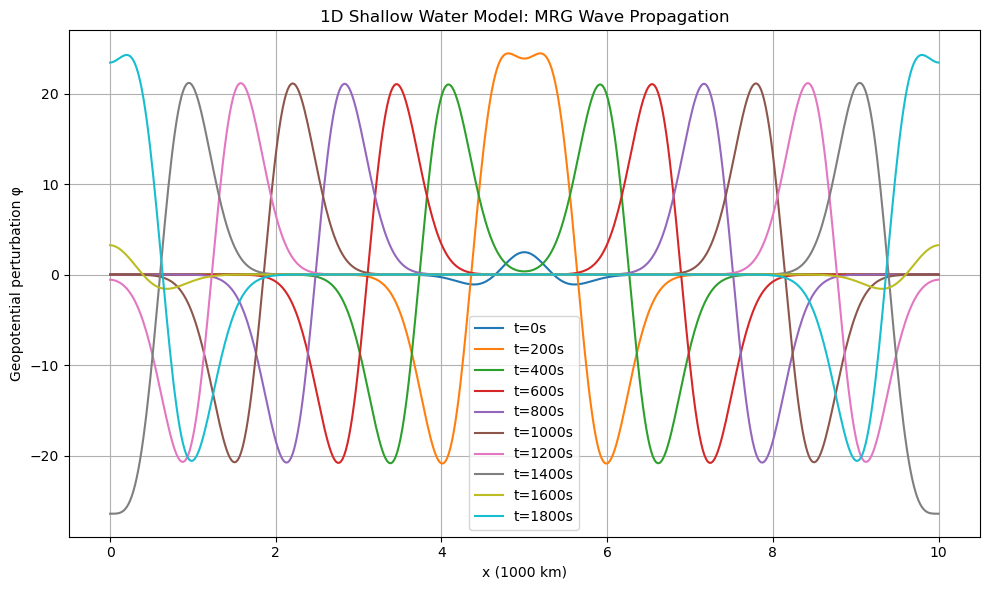

In [34]:
# Plot evolution
plt.figure(figsize=(10, 6))
for i, frame in enumerate(phi_all[::10]):
    plt.plot(x / 1e6, frame, label=f't={i*200}s')
plt.xlabel("x (1000 km)")
plt.ylabel("Geopotential perturbation φ")
plt.title("1D Shallow Water Model: MRG Wave Propagation")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


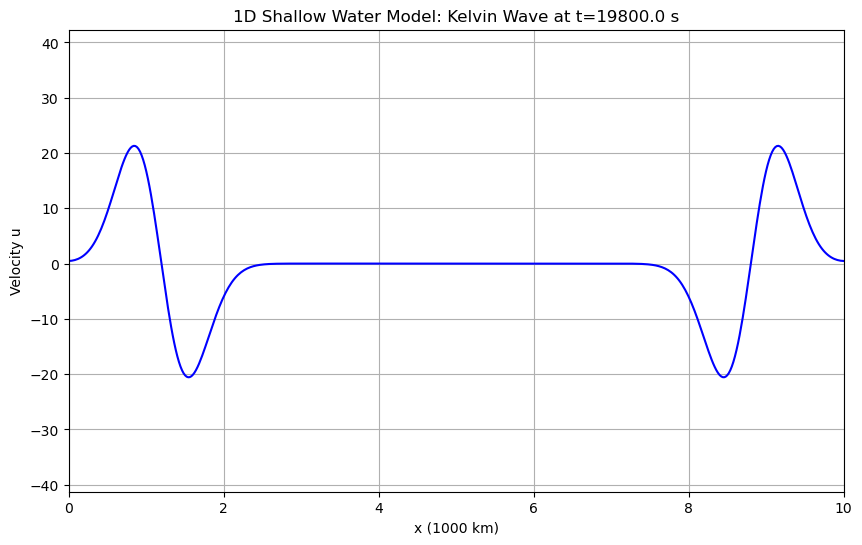

In [35]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

fig, ax = plt.subplots(figsize=(10,6))
line, = ax.plot(x / 1e6, phi_all[0], color='b')
ax.set_xlim(0, Lx / 1e6)
ax.set_ylim(np.min(phi_all), np.max(u_all))
ax.set_xlabel("x (1000 km)")
ax.set_ylabel("Velocity u")
ax.set_title("1D Shallow Water Model: Kelvin Wave Propagation")
ax.grid()

def update(frame):
    line.set_ydata(phi_all[frame])
    ax.set_title(f"1D Shallow Water Model: Kelvin Wave at t={frame*dt*10:.1f} s")
    return line,

anim = FuncAnimation(fig, update, frames=len(phi_all), interval=100, blit=True)

HTML(anim.to_jshtml())
